In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer

In [23]:
df=pd.read_csv("D:/Documents/Datasets/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
col=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked']
df.drop(col,axis=1,inplace=True)

In [25]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [26]:
df["Age"]=df["Age"].fillna(np.mean(df["Age"]))

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [29]:
inputs=df.drop("Survived",axis=1)
target=df["Survived"]

In [30]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


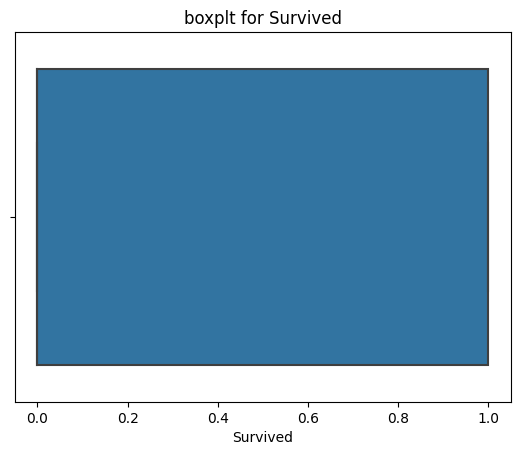

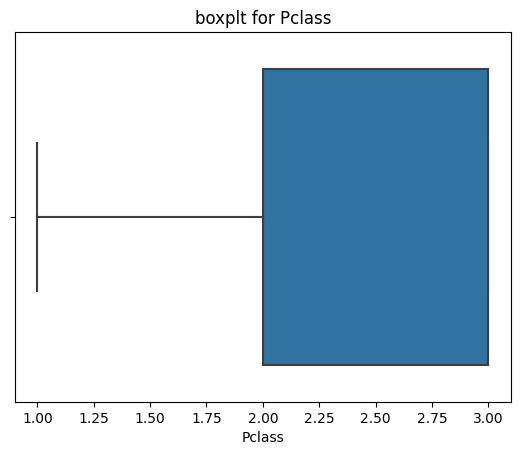

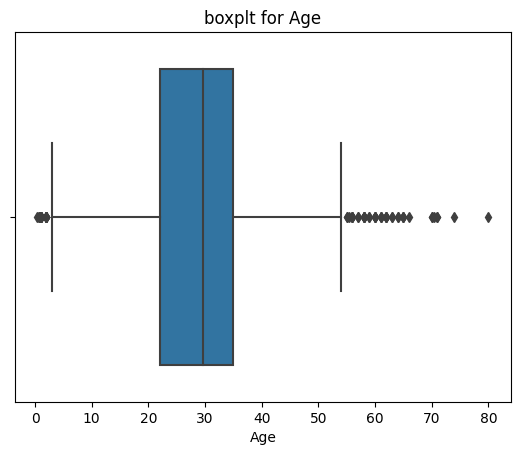

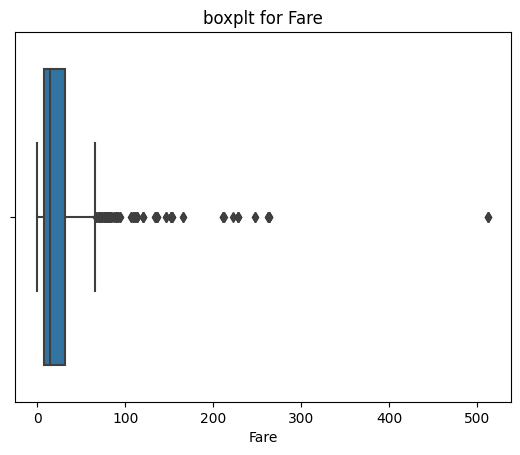

In [31]:
num=df.select_dtypes(include=["int64","float64"]).columns
for col in num:
    sns.boxplot(x=df[col])
    plt.title(f"boxplt for {col}")
    plt.show()

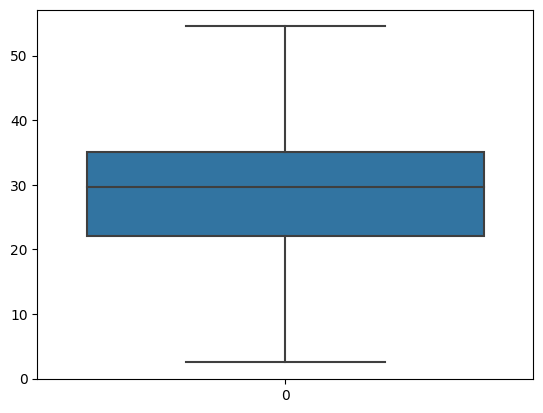

In [35]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Age"],tail="both")
df["Age"]=winsor.fit_transform(df[["Age"]])
sns.boxplot(df["Age"])
plt.show()

In [ ]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Age"],tail="both")
df["Age"]=winsor.fit_transform(df[["Age"]])
sns.boxplot(df["Age"])
plt.show()

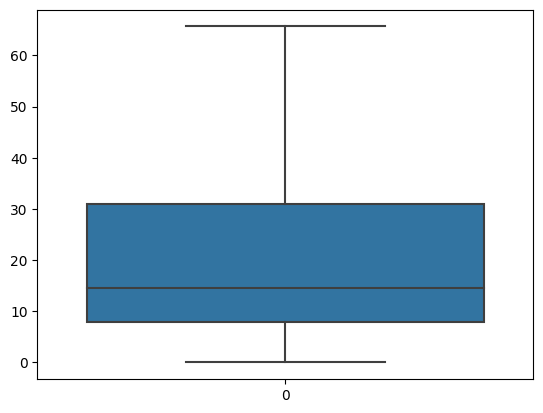

In [36]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Fare"],tail="both")
df["Fare"]=winsor.fit_transform(df[["Fare"]])
sns.boxplot(df["Fare"])
plt.show()

In [37]:
le=LabelEncoder()
inputs["Sex"]=le.fit_transform(inputs["Sex"])

In [38]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [39]:
inputs.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [41]:
model=DecisionTreeClassifier()

In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [44]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7206703910614525


In [45]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1
Actual,,
0,91,28
1,22,38


In [46]:
model.predict([[3,1,34.5,7.8292]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)